In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [6]:
iris_data = load_iris()

X = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
y = pd.DataFrame(iris_data.target, columns = ['class'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
y_train = y_train.values.ravel()

* n_estimators의 n : 랜덤 포레스트 모델이 결정 트리를 몇 개를 만들어서 예측할 것인지를 나타냄
* -> 안쓰면 기본값은 10

In [9]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 4)

In [10]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [11]:
model.predict(X_test)

array([1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [12]:
model.score(X_test, y_test)

0.9

### 랜덤 포레스트도 결정 트리를 이용하기 때문에 평균 지니 감소를 이용해 속성 중요도 예측이 가능
-> 모델을 학습 시키면 feature_importances_ 변수에 자동 저장됨

In [14]:
importances = model.feature_importances_

### 속성 중요도 시각화

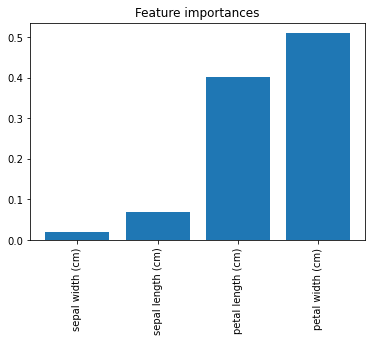

In [16]:
indices_sorted = np.argsort(importances)

plt.figure()
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X.columns[indices_sorted], rotation=90)
plt.show()